In [26]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

from sklearn.linear_model import LinearRegression

In [27]:
data = pd.read_csv('dataset/real_estate.csv')

data['view_map'] = data['view'].map({'No sea view':0, 'Sea view':1}) 

data.head()

,price,size,year,view,view_map
0,234314.144,643.09,2015,No sea view,0
1,228581.528,656.22,2009,No sea view,0
2,281626.336,487.29,2018,Sea view,1
3,401255.608,1504.75,2015,No sea view,0
4,458674.256,1275.46,2009,Sea view,1


# discovery

In [28]:
data.describe()

# %49 is no sea view, not bad

,price,size,year,view_map
count,100.000000,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000,0.490000
std,77051.727525,297.941951,4.729021,0.502418
min,154282.128000,479.750000,2006.000000,0.000000
25%,234280.148000,643.330000,2009.000000,0.000000
50%,280590.716000,696.405000,2015.000000,0.000000
75%,335723.696000,1029.322500,2018.000000,1.000000
max,500681.128000,1842.510000,2018.000000,1.000000


### visualization

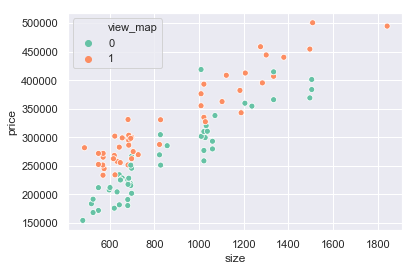

In [29]:
ax1 = sns.scatterplot(x='size', y='price', hue='view_map', palette='Set2', data=data)


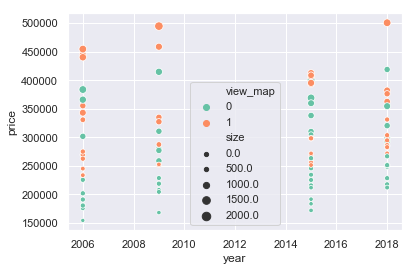

In [30]:
ax = sns.scatterplot(x='year', y='price', hue='view_map', size='size', palette='Set2', data=data)


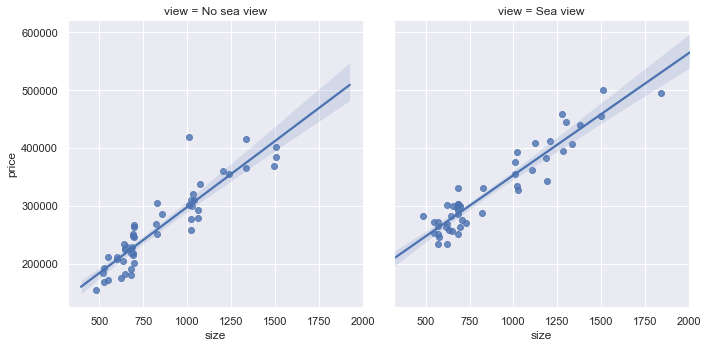

In [38]:
# sns.regplot(x="size", y="price", data=data);
sns.lmplot(x="size", y="price", col='view', data=data);


# regression

In [32]:
# we need OLS w/ constant **for lineer regression**
y = data['price']
x = data[['size', 'year','view_map']]

x.shape, y.shape

((100, 3), (100,))

### standardization - _feature scaling_

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

scaler.fit(x)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
x_scaled = scaler.transform(x)

x_scaled[0:3]

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[-0.70816415,  0.51006137, -0.98019606],
       [-0.66387316, -0.76509206, -0.98019606],
       [-1.23371919,  1.14763808,  1.02020406]])

### regression

In [36]:
# do regression w/ default settings, copy_X, fit_intercept, n_jobs, normalize

reg = LinearRegression()

reg.fit(x_scaled, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
# get regression results

summary = pd.DataFrame(data=[['Bias', reg.intercept_], 
                             ['size', reg.coef_[0]], 
                             ['year', reg.coef_[1]],
                             ['view', reg.coef_[2]],
                            ],
                      columns=['Features', 'Weights'])

summary

# print('r-squared:', reg.score(x_scaled, y),
#       '\nadjusted r-squared:', 1- (1-reg.score(x_scaled, y)) * (x_scaled.shape[0]-1) / (x_scaled.shape[0]-x_scaled.shape[1]-1))


,Features,Weights
0,Bias,292289.470160
1,size,66117.388569
2,year,12793.514096
3,view,28357.336730


# validations

In [47]:

test_data = pd.DataFrame(data=[[750,2009,0],
                               [750,2009,1],
                               [750,2010,0]], 
                         columns=['size', 'year', 'view'])

test_data

,size,year,view
0,750,2009,0
1,750,2009,1
2,750,2010,0


In [48]:
test_data['predicted_price'] = reg.predict(scaler.transform(test_data))

test_data

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


,size,year,view,predicted_price
0,750,2009,0,231727.850292
1,750,2009,1,288453.870090
2,750,2010,0,234446.799181
